<a href="https://colab.research.google.com/github/BusraCevik/SignLanguageRecognition/blob/main/SignLanguageKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving SignLanguage.zip to SignLanguage (1).zip
dict_keys(['SignLanguage (1).zip'])
['amer_sign2.png', 'amer_sign3.png', 'american_sign_language.PNG', 'sign_mnist_test.csv', 'sign_mnist_test/sign_mnist_test.csv', 'sign_mnist_train.csv', 'sign_mnist_train/sign_mnist_train.csv']
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       

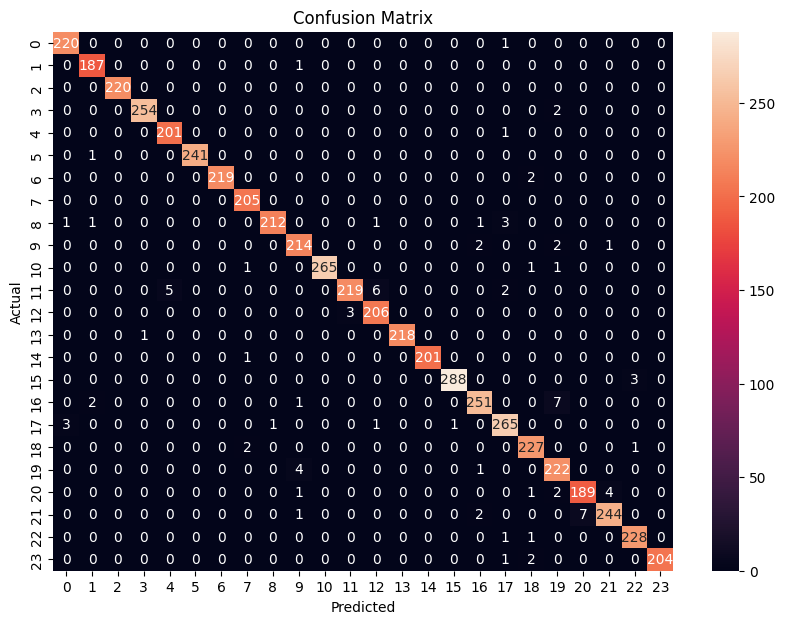

In [ ]:
# Gerekli kütüphaneleri yükleme
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import files
import io
import zipfile

# Veri setini yükleme
uploaded = files.upload()

# Yüklenen dosyaların isimlerini yazdırma
print(uploaded.keys())

# Yüklenen zip dosyasını açma
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        with zipfile.ZipFile(io.BytesIO(uploaded[filename]), 'r') as zip_ref:
            zip_ref.extractall()

# Zip içerisindeki dosya adını kontrol etme ve veri setini yükleme
extracted_files = zip_ref.namelist()
print(extracted_files)


df = pd.read_csv('sign_mnist_train.csv')


print(df.head())
print(df.info())
print(df.describe())

# Veri ön işleme
X = df.drop('label', axis=1)
y = df['label']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN modelini eğitme
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

# Modeli değerlendirme
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Sonuçları görselleştirme
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
